# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [2]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the *original* dataset...

In [3]:
original_df = pd.read_csv('~/diplo/clases/AprendizajeSupervisado/practico/data/train.csv')

In [4]:
original_df.columns

Index([&#39;TripType&#39;, &#39;VisitNumber&#39;, &#39;Weekday&#39;, &#39;Upc&#39;, &#39;ScanCount&#39;,
       &#39;DepartmentDescription&#39;, &#39;FinelineNumber&#39;],
      dtype=&#39;object&#39;)

**TripType** is the column that we should predict. That column is not present in the test set

##TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category. 

##VisitNumber - an id corresponding to a single trip by a single customer

##Weekday - the weekday of the trip

##Upc - the UPC number of the product purchased

##ScanCount - the number of the given item that was purchased. A negative value indicates a product return.

##DepartmentDescription - a high-level description of the item's department

##FinelineNumber - a more refined category for each of the products, created by Walmart


Each visit number is the ID for a trip, and will be repeated for every item that is purchased on that trip.

In [5]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [6]:
We want to know how many department we have, we can find some relationship between the triptype and the department descritpion of each item purchased

SyntaxError: invalid syntax (&lt;ipython-input-6-71f2d3ebbf61&gt;, line 1)

In [5]:
dummies = pd.get_dummies(original_df.DepartmentDescription)
dummies.columns
 

Index([&#39;1-HR PHOTO&#39;, &#39;ACCESSORIES&#39;, &#39;AUTOMOTIVE&#39;, &#39;BAKERY&#39;, &#39;BATH AND SHOWER&#39;,
       &#39;BEAUTY&#39;, &#39;BEDDING&#39;, &#39;BOOKS AND MAGAZINES&#39;, &#39;BOYS WEAR&#39;,
       &#39;BRAS &amp; SHAPEWEAR&#39;, &#39;CAMERAS AND SUPPLIES&#39;, &#39;CANDY, TOBACCO, COOKIES&#39;,
       &#39;CELEBRATION&#39;, &#39;COMM BREAD&#39;, &#39;CONCEPT STORES&#39;, &#39;COOK AND DINE&#39;, &#39;DAIRY&#39;,
       &#39;DSD GROCERY&#39;, &#39;ELECTRONICS&#39;, &#39;FABRICS AND CRAFTS&#39;,
       &#39;FINANCIAL SERVICES&#39;, &#39;FROZEN FOODS&#39;, &#39;FURNITURE&#39;,
       &#39;GIRLS WEAR, 4-6X  AND 7-14&#39;, &#39;GROCERY DRY GOODS&#39;, &#39;HARDWARE&#39;,
       &#39;HEALTH AND BEAUTY AIDS&#39;, &#39;HOME DECOR&#39;, &#39;HOME MANAGEMENT&#39;,
       &#39;HORTICULTURE AND ACCESS&#39;, &#39;HOUSEHOLD CHEMICALS/SUPP&#39;,
       &#39;HOUSEHOLD PAPER GOODS&#39;, &#39;IMPULSE MERCHANDISE&#39;, &#39;INFANT APPAREL&#39;,
       &#39;INFANT CONSUMABLE HARDL

In [7]:
original_df.loc[original_df.ScanCount < 0, 'Return'] = 1

Looking into the columns values...

In [9]:
set(original_df.Weekday)

{&#39;Friday&#39;, &#39;Monday&#39;, &#39;Saturday&#39;, &#39;Sunday&#39;, &#39;Thursday&#39;, &#39;Tuesday&#39;, &#39;Wednesday&#39;}

There are `nan`s in the column, let us find them...

In [ ]:
original_df[original_df.DepartmentDescription.isna()]

In [7]:
print("we have some NaN for Department description but they represent", len(original_df[original_df.DepartmentDescription.isna()])/len(original_df))

we have some NaN for Department description but they represent 0.002143750372178884


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [12]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [13]:
original_df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,...,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453406,22,191344,Sunday,7.315096e+10,1,BEAUTY,3405.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
453407,22,191344,Sunday,6.505300e+10,1,WIRELESS,1712.0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
453408,22,191344,Sunday,7.918131e+09,1,BEAUTY,3405.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
453409,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [14]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,...,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Return
739,999,484,Friday,NaN,-2,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
740,999,484,Friday,NaN,-2,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
900,5,585,Friday,NaN,1,PHARMACY RX,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
450163,40,190230,Sunday,NaN,1,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


But it may be the case that Upc is NaN but not the description...

In [15]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

&lt;AxesSubplot:&gt;

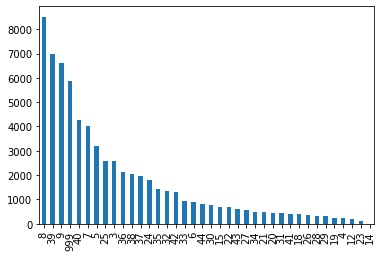

In [8]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby(["VisitNumber","Weekday"]).max().TripType.value_counts().plot(kind='bar')

**Unbalanced!!!**

### Digging into the data

[Text(0.5, 1.0, &#39;The Frequent of Trip Type&#39;),
 Text(0, 0.5, &#39;Counts&#39;),
 Text(0.5, 0, &#39;Trip Type&#39;)]

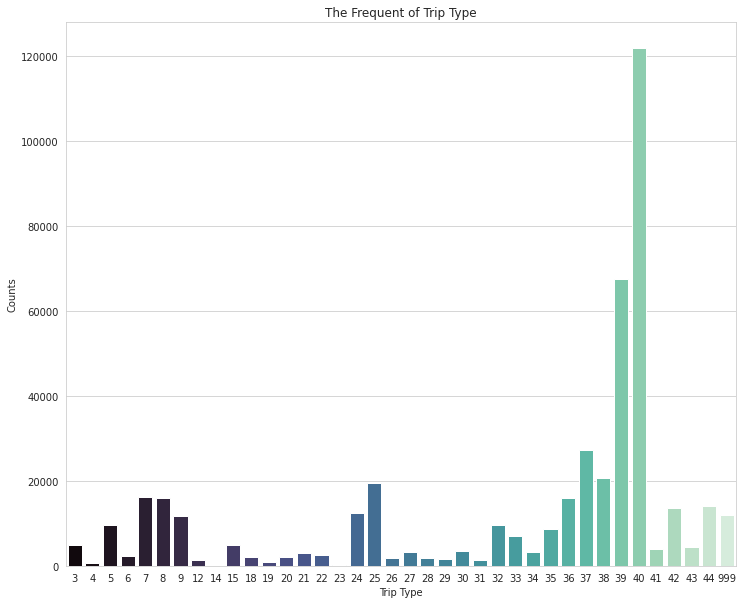

In [18]:
plt.figure(figsize = (12, 10))
sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = original_df, palette = 'mako')
ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

[Text(0.5, 1.0, &#39;The Frequent of Weekday&#39;),
 Text(17.19999999999999, 0.5, &#39;Counts&#39;),
 Text(0.5, 17.200000000000003, &#39;Weekday&#39;)]

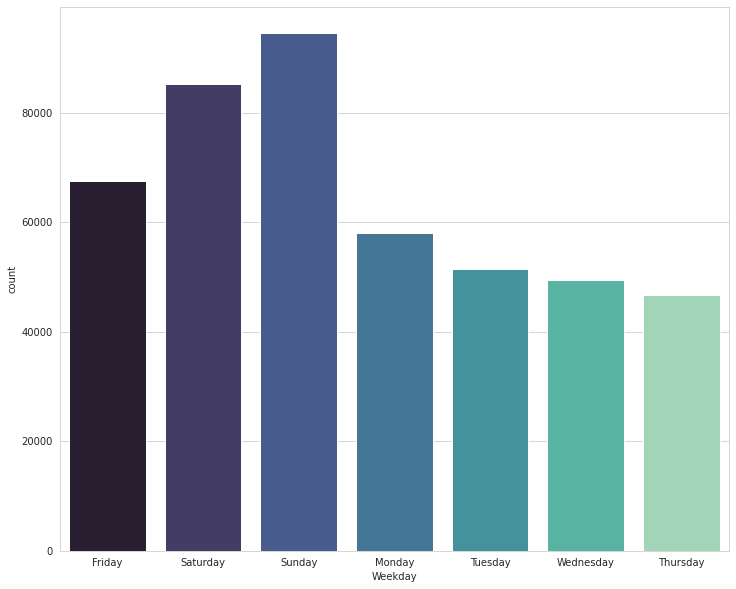

In [19]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'Weekday', data = original_df, palette = 'mako')
ax.set(title = 'The Frequent of Weekday', ylabel = 'Counts', xlabel = 'Weekday')

[Text(0.5, 1.0, &#39;The Frequent of Weekday&#39;),
 Text(17.19999999999999, 0.5, &#39;Counts&#39;),
 Text(0.5, 17.200000000000003, &#39;Weekday&#39;)]

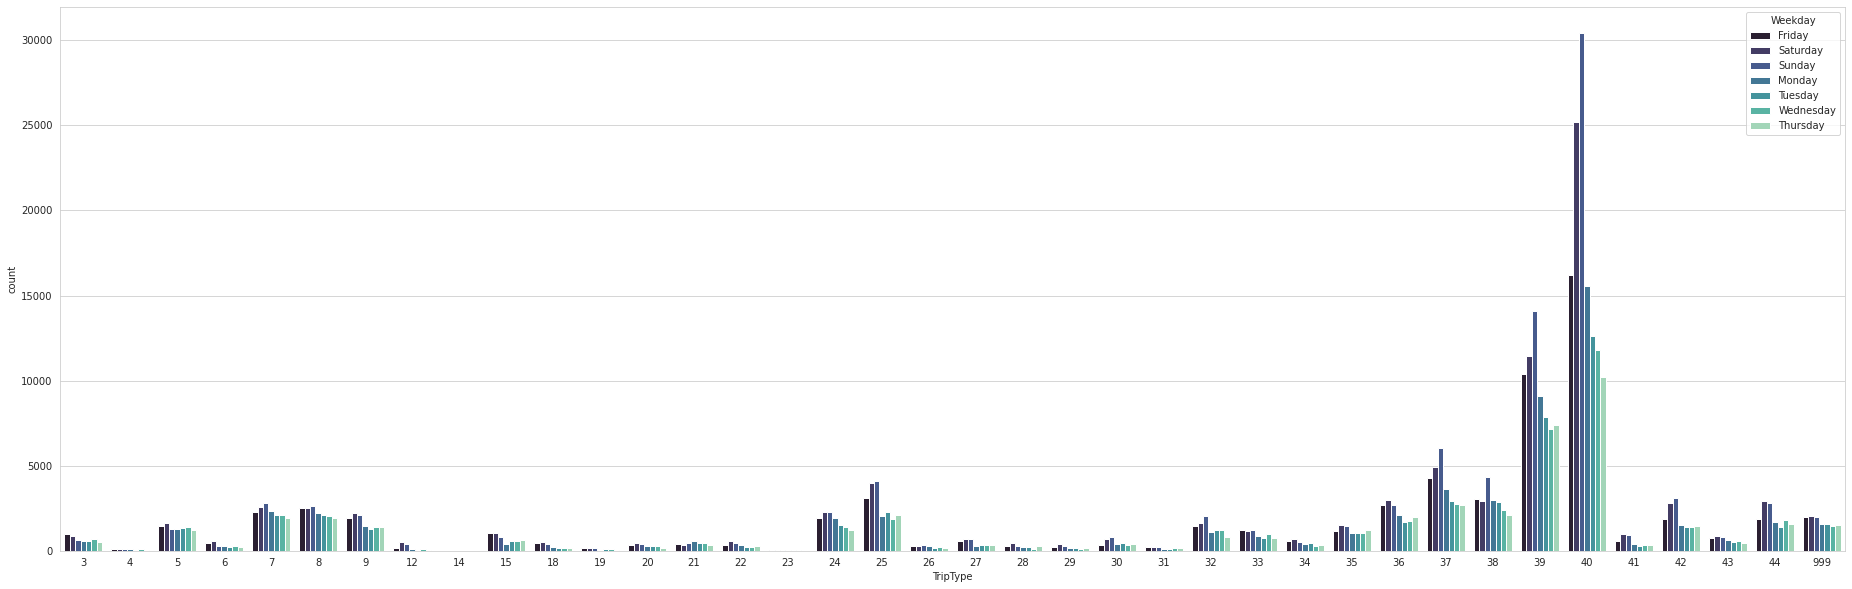

In [20]:
plt.figure(figsize = (32, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'TripType', hue = 'Weekday', data = original_df, palette = 'mako')
ax.set(title = 'The Frequent of Weekday', ylabel = 'Counts', xlabel = 'Weekday')

&lt;AxesSubplot:xlabel=&#39;Weekday&#39;&gt;

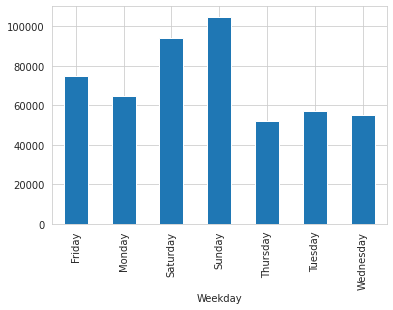

In [22]:
original_df.groupby(['Weekday'])['ScanCount'].sum().plot.bar()

Text(0.5, 1.0, &#39;The Frequent of Department Description&#39;)

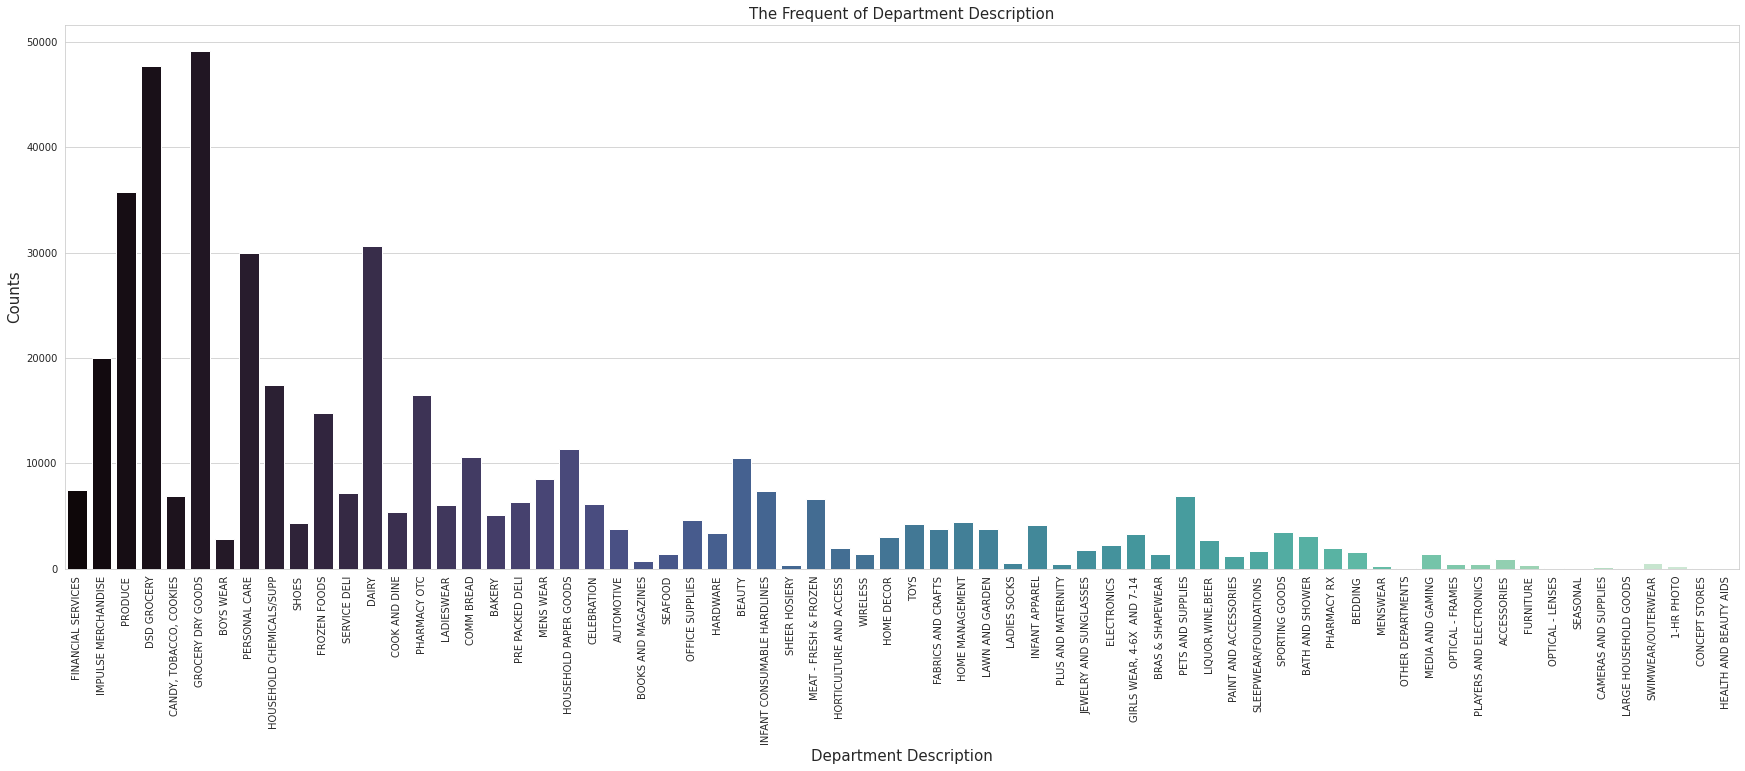

In [24]:
plt.figure(figsize = (30, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'DepartmentDescription', data = original_df, palette = 'mako')
plt.xticks(rotation = 90)
plt.xlabel('Department Description', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.title('The Frequent of Department Description', fontsize = 15)

In [25]:
original_df['DepartmentDescription'].value_counts()

GROCERY DRY GOODS         49134
DSD GROCERY               47670
PRODUCE                   35769
DAIRY                     30640
PERSONAL CARE             29914
                          ...  
LARGE HOUSEHOLD GOODS        52
CONCEPT STORES               27
OTHER DEPARTMENTS            23
SEASONAL                     16
HEALTH AND BEAUTY AIDS        2
Name: DepartmentDescription, Length: 68, dtype: int64

In [26]:
total = original_df.isnull().sum().sort_values(ascending = False)
print(total)
percentage = total / original_df.shape[0]
print('Percentage'.center(50, '-'))
print(percentage)
missingData = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
missingData

Return                   442535
Upc                        2852
FinelineNumber             2852
DepartmentDescription       972
FROZEN FOODS                  0
                          ...  
MENSWEAR                      0
OFFICE SUPPLIES               0
OPTICAL - FRAMES              0
OPTICAL - LENSES              0
TripType                      0
Length: 76, dtype: int64
--------------------Percentage--------------------
Return                   0.976013
Upc                      0.006290
FinelineNumber           0.006290
DepartmentDescription    0.002144
FROZEN FOODS             0.000000
                           ...   
MENSWEAR                 0.000000
OFFICE SUPPLIES          0.000000
OPTICAL - FRAMES         0.000000
OPTICAL - LENSES         0.000000
TripType                 0.000000
Length: 76, dtype: float64


,Total,Percentage
Return,442535,0.976013
Upc,2852,0.006290
FinelineNumber,2852,0.006290
DepartmentDescription,972,0.002144
FROZEN FOODS,0,0.000000
...,...,...
MENSWEAR,0,0.000000
OFFICE SUPPLIES,0,0.000000
OPTICAL - FRAMES,0,0.000000
OPTICAL - LENSES,0,0.000000


&lt;AxesSubplot:&gt;

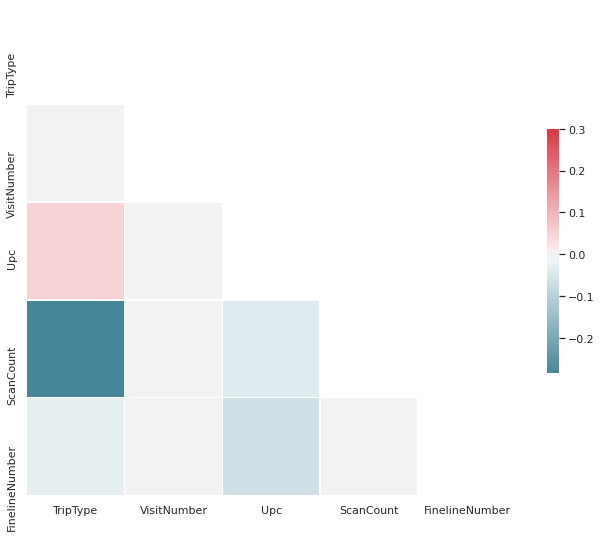

In [9]:
sns.set(style="white")

# Compute the correlation matrix
corr = original_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is a big correllation between UPC and ScanCount with tripType

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently: